## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import plotly.graph_objs as go
import plotly.express as px
import plotly
from scipy import stats
import matplotlib.style as style
from scipy.stats import skew
from plotly.offline import init_notebook_mode, iplot

## Reading Dataset

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezarahhmati","key":"18b171ce6743a67bae3362ff8a46046f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 75.8MB/s]


In [ ]:
! unzip house-prices-advanced-regression-techniques.zip -d data

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data/data_description.txt  
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
df = pd.read_csv("/content/data/train.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.shape

(1460, 81)

In [ ]:
df["LotFrontage"].dtype

dtype('float64')

In [ ]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [ ]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## EDA

### Visualizing

In [ ]:
corr = df.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

<ipython-input-19-6b68113173ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()["SalePrice"]


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

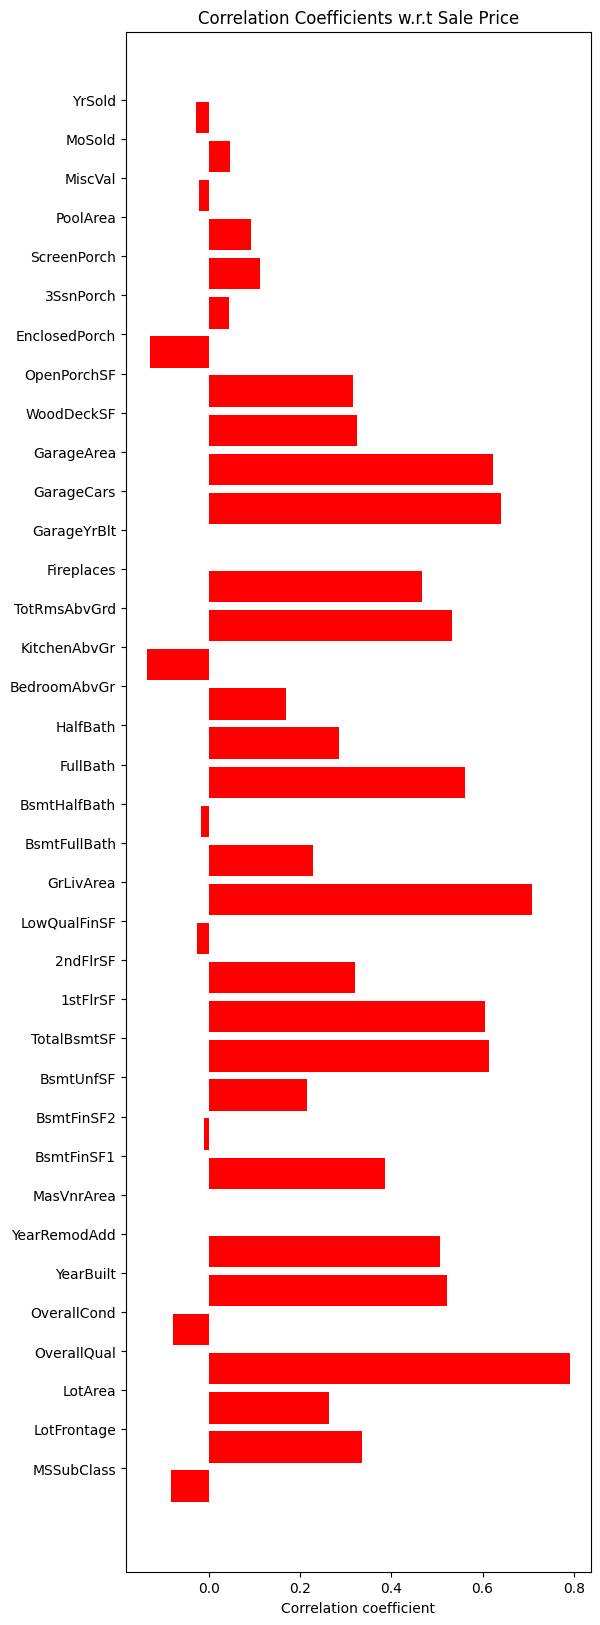

In [ ]:
#plotting correlations
num_feat = df.columns[df.dtypes!=object]
num_feat=num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.SalePrice.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(6,20))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [ ]:
import seaborn as sns

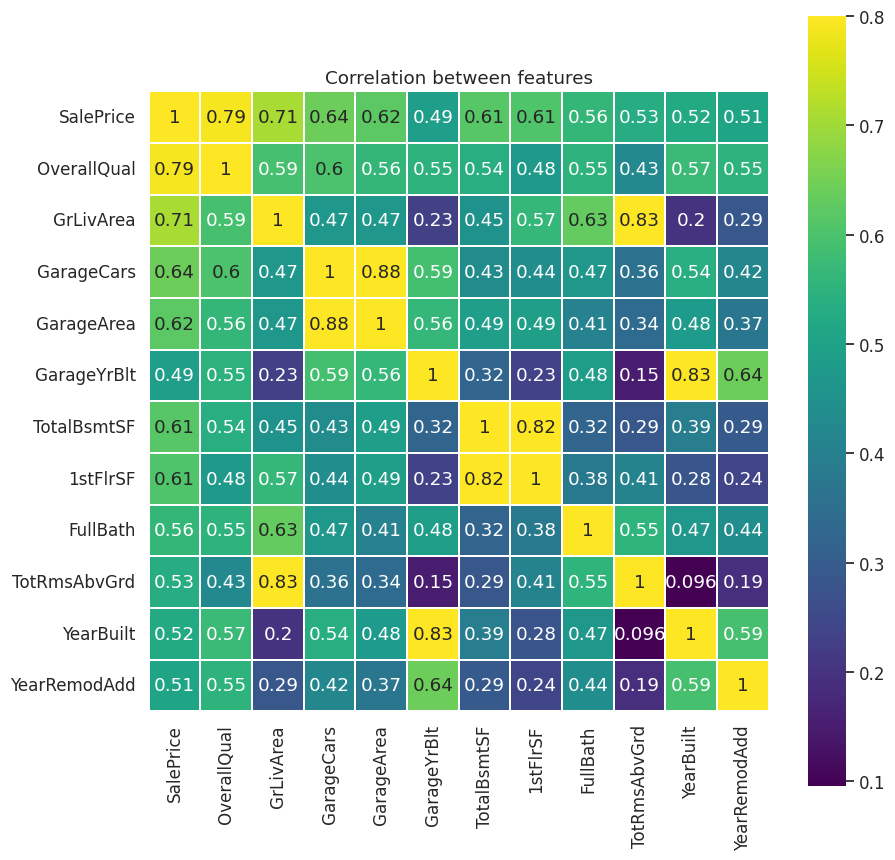

In [ ]:
corrMatrix = df[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

<ipython-input-31-01ae19db5986>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'],kde=False,ax=ax)


Text(0, 0.5, 'Freq')

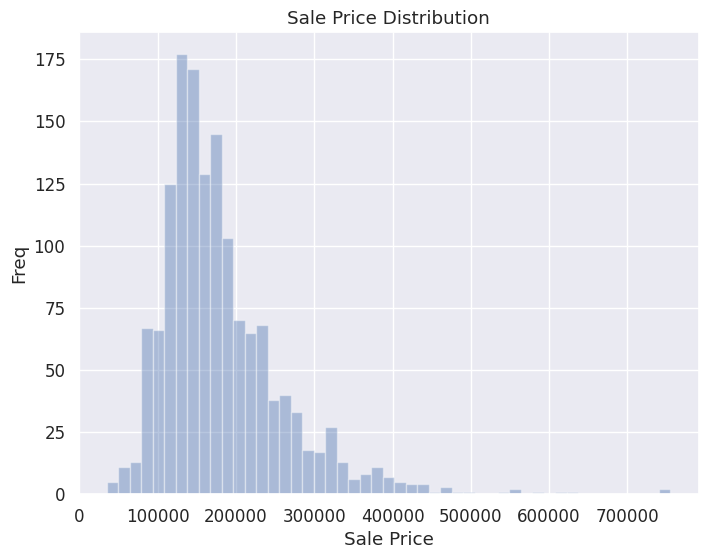

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['SalePrice'],kde=False,ax=ax)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Freq')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

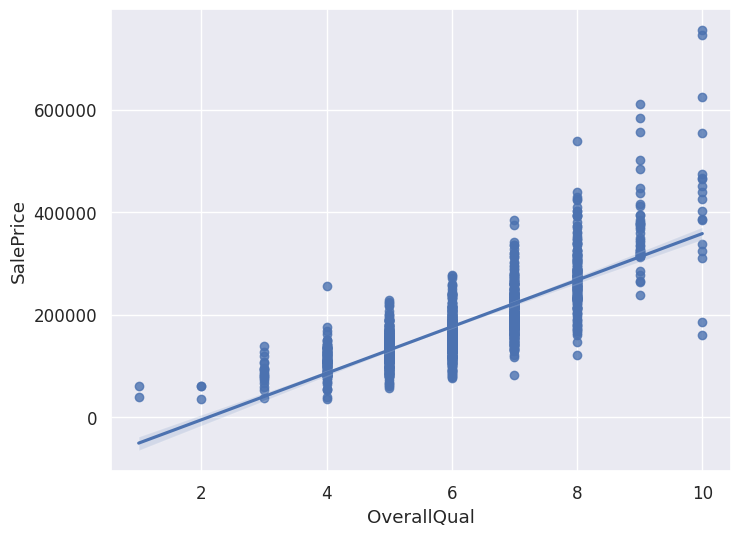

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'OverallQual', y='SalePrice' , data=df,ax=ax)

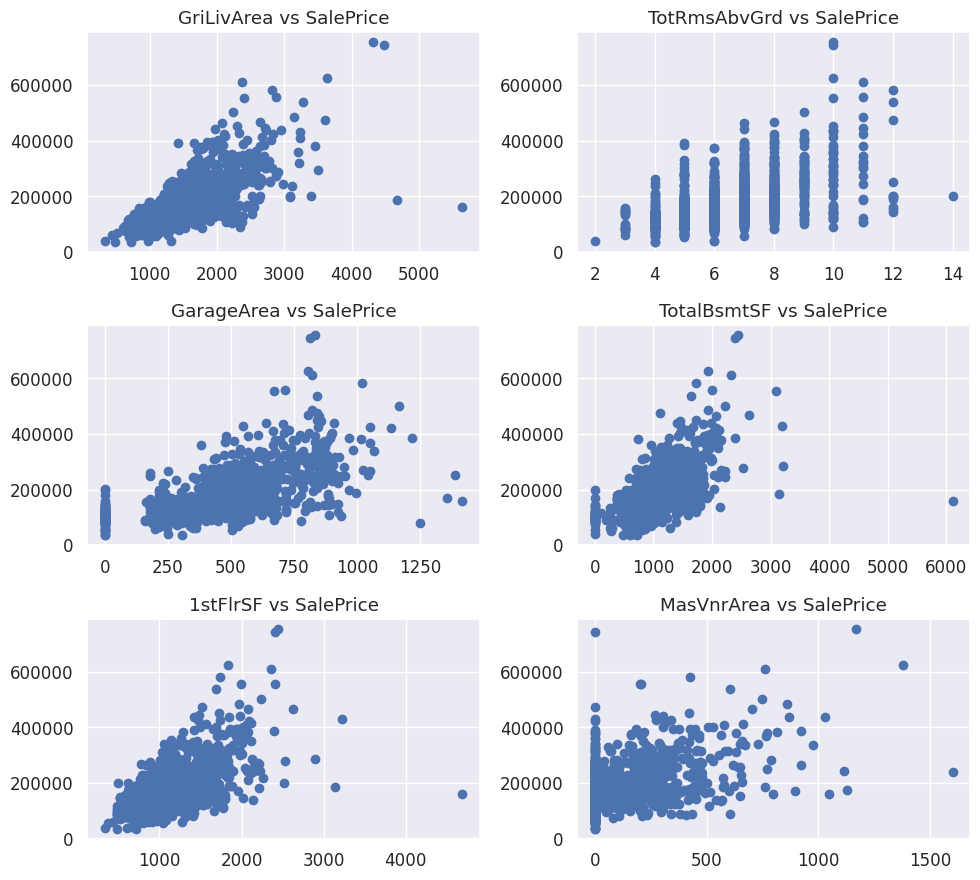

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(10,9))
sale_price = df['SalePrice'].values


ax[0,0].scatter(df['GrLivArea'],sale_price)
ax[0,0].set_title('GriLivArea vs SalePrice')
ax[0,1].scatter(df['TotRmsAbvGrd'],sale_price)
ax[0,1].set_title('TotRmsAbvGrd vs SalePrice')
ax[1,0].scatter(df['GarageArea'],sale_price)
ax[1,0].set_title('GarageArea vs SalePrice')
ax[1,1].scatter(df['TotalBsmtSF'],sale_price)
ax[1,1].set_title('TotalBsmtSF vs SalePrice')
ax[2,0].scatter(df['1stFlrSF'],sale_price)
ax[2,0].set_title('1stFlrSF vs SalePrice')
ax[2,1].scatter(df['MasVnrArea'],sale_price)
ax[2,1].set_title('MasVnrArea vs SalePrice')
plt.tight_layout()

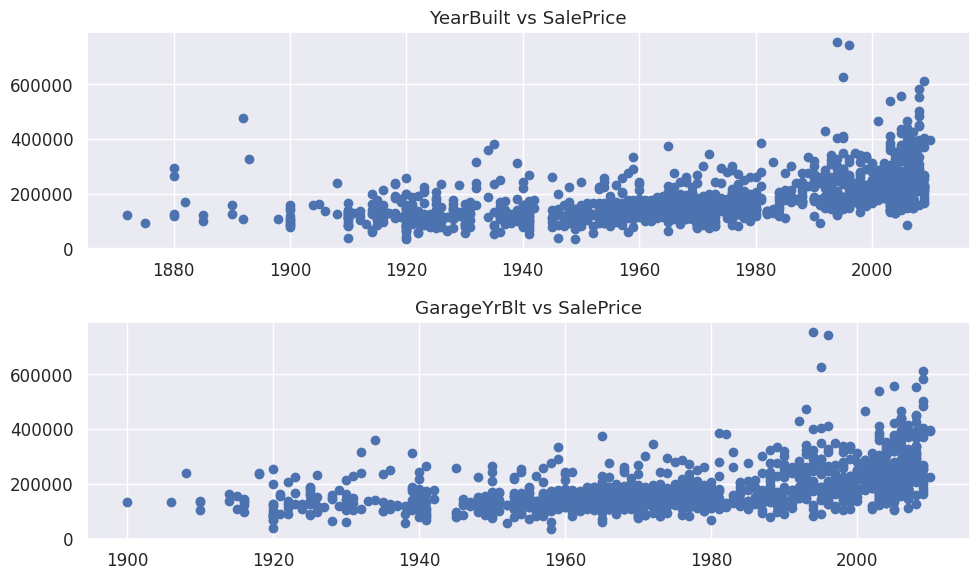

In [ ]:
fig = plt.figure(2,figsize=(10,6))
plt.subplot(211)
plt.scatter(df['YearBuilt'].values,sale_price)
plt.title('YearBuilt vs SalePrice')
plt.subplot(212)
plt.scatter(df['GarageYrBlt'].values,sale_price)
plt.title('GarageYrBlt vs SalePrice')
plt.tight_layout()

In [ ]:
fig = px.bar(df, x="YearBuilt", y="SalePrice",
              barmode='group',
             height=600)
fig.show()

In [ ]:
fig = px.bar(df, x="YearRemodAdd", y="SalePrice",
              barmode='group',
             height=600, color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [ ]:
train_x = df["2ndFlrSF"]
train_y = df["SalePrice"]
colors = np.random.rand(2938)
sz = np.random.rand(2000)*30

fig = go.Figure()
fig.add_scatter(x = train_x,
                y = train_y,
                mode = 'markers',
                marker = {'size': sz,
                         'color': colors,
                         'opacity': 0.6,
                         'colorscale': 'Portland',

                       })

plotly.offline.iplot(fig)

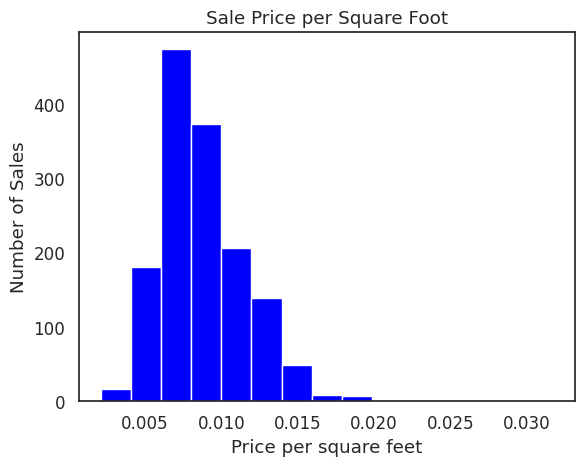

In [ ]:
train1 = df
train1['SalePriceSF'] = df['SalePrice']/df['GrLivArea']
plt.hist(df['SalePriceSF'], bins=15,color="blue")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

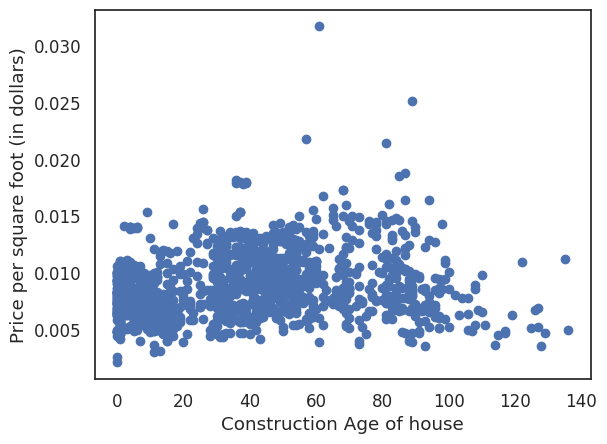

In [ ]:
train1['ConstructionAge'] = df['YrSold'] - df['YearBuilt']
plt.scatter(train1['ConstructionAge'], df['SalePriceSF'])
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

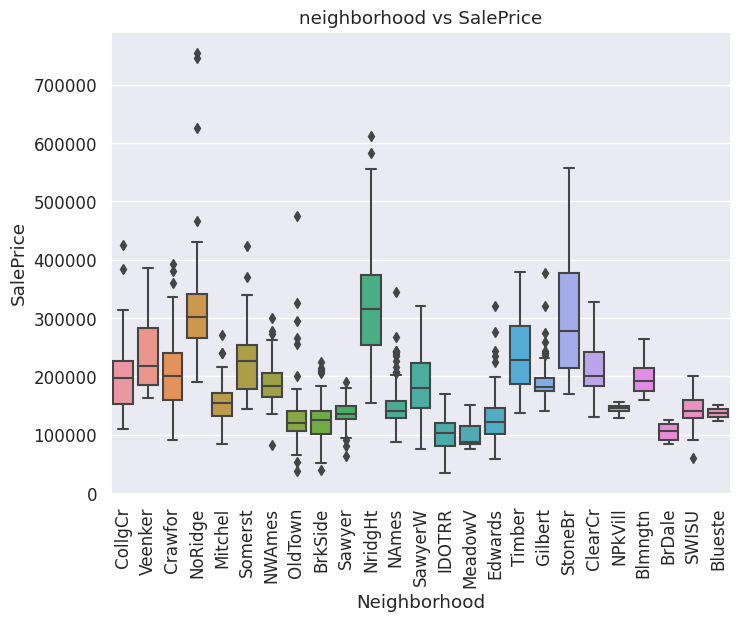

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df,ax=ax)
plt.title('neighborhood vs SalePrice')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [ ]:
fig = px.pie(df, names = "GarageType", title = "Garage location", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [ ]:
fig = px.pie(df, names = "SaleType", title = "Type of sale", color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [ ]:
fig = px.pie(df, names = "SaleCondition", title = "Condition of sale")
fig.show()

In [ ]:
fig =px.bar(df,x='ExterQual', y='SalePrice',barmode='group',
             height=600)
fig.show()

In [ ]:
fig =px.bar(df,x='MSZoning', y='SalePrice',barmode='group',
             height=800, color_discrete_sequence=["fuchsia"])

fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'])
fig.show()

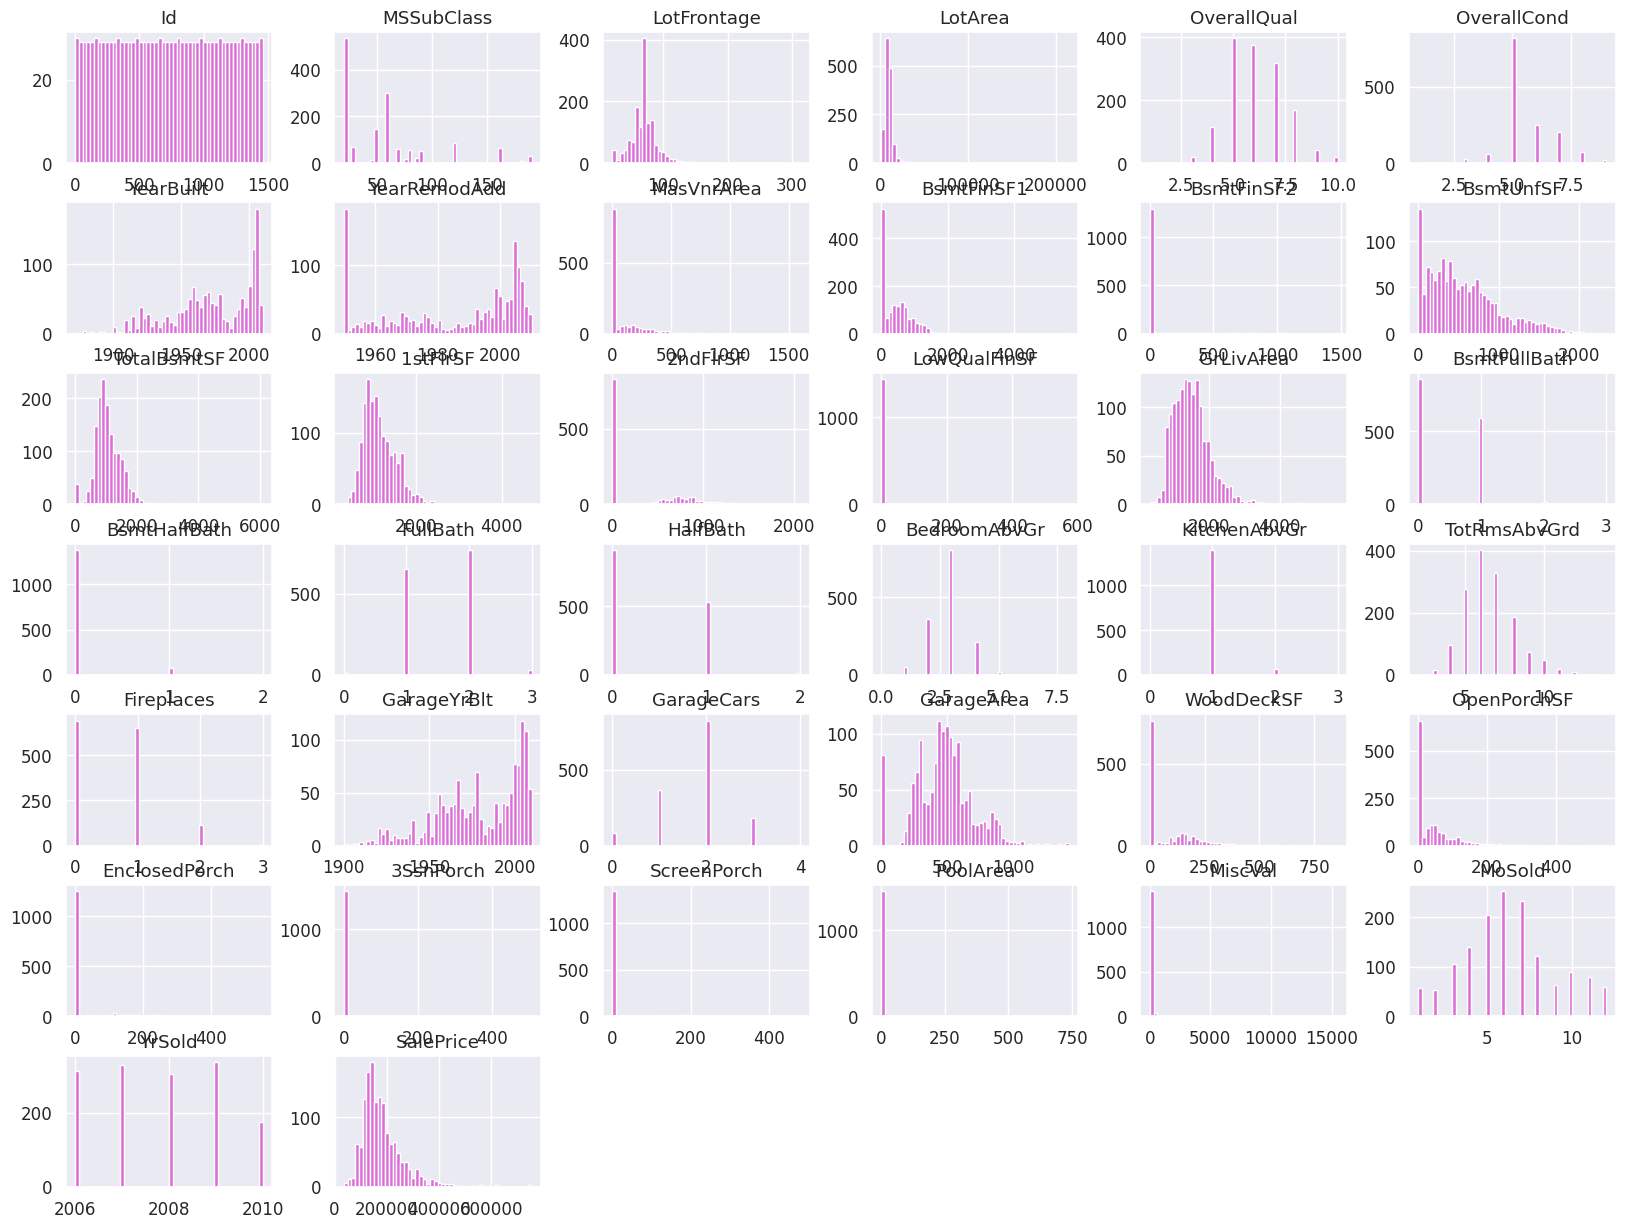

In [ ]:
df.hist(bins=50, figsize=(20,15), color='orchid')
plt.show()

Overview of the Target Variable

<ipython-input-57-983be5ab1ed8>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




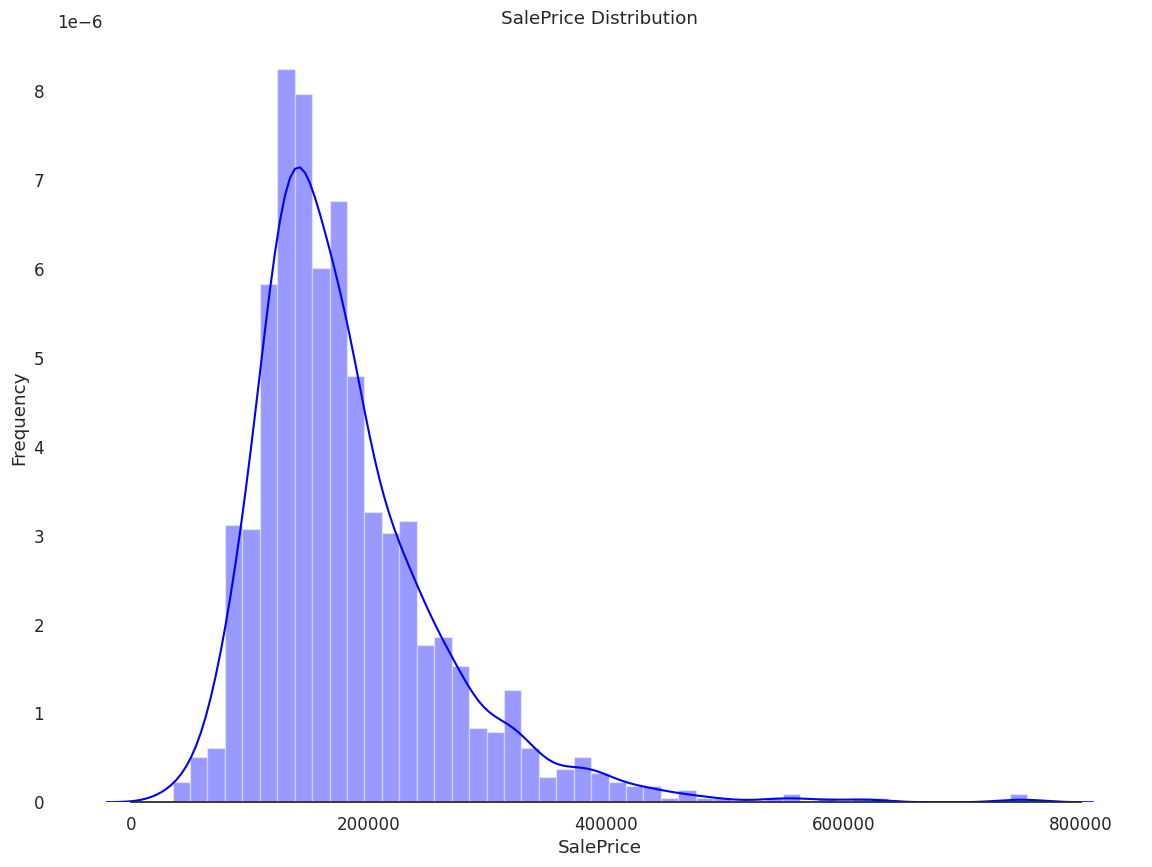

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette="deep")
f,ax = plt.subplots(figsize=(14,10))

sns.distplot(df['SalePrice'], color="Blue" )
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution" )
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
print("Skewness : %f" % df['SalePrice'].skew())
print("Kurtosis : %f" % df['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


The skewness value is 1, that means that the data are moderately skewed, and the high Kurtosis indicates that the data

has heavy tails or outliers, so we need to investigate!

We notice in the graph above that the variable target is right skewed, the best way to fix it is to perform a log transformation of the same data.

<ipython-input-63-fee1f1059437>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




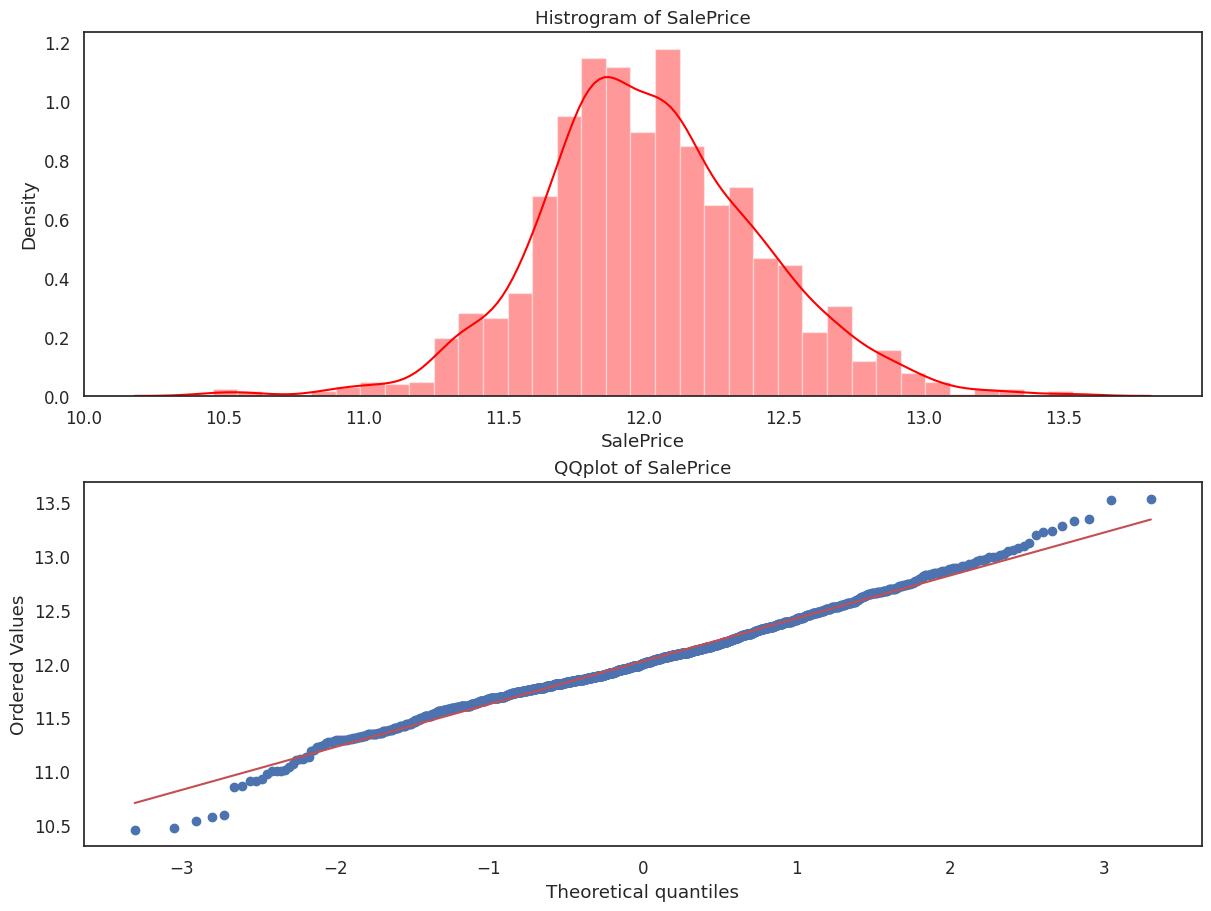

In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.set_color_codes(palette="deep")

## Visualize of SalePrice after the normalization
fig,(ax1,ax2) = plt.subplots(2,1,constrained_layout=True,figsize=(12,9))

 # Histrogram
sns.distplot(df['SalePrice'],ax=ax1, color= "red")
ax1.set_title("Histrogram of SalePrice")
 # QQplot
stats.probplot(df['SalePrice'],plot=ax2)
ax2.set_title("QQplot of SalePrice")

plt.show()

### Statistic analysis

#### What are The building class and why it is important?


Building class is a system of classifying buildings based on their quality, location, and amenities. It is typically used to assess the value and desirability of a building, and can be used by tenants, buyers, and investors to make informed decisions.

The building class in tthis dataset, represented by the "MSSubClass" variable, categorizes the type of dwellings involved in the sale. Understanding the building class is important for several reasons:



*   Building Type Identification: It distinguishes various property types, helping buyers and sellers understand the diversity of structures in the dataset.

*   Pricing Differences: Different building classes often have distinct price ranges, making it important for pricing analysis and prediction.

*   Feature Engineering: It is a valuable feature for machine learning models to predict house prices effectively.

*   Insights for Homebuyers: Helps buyers make informed decisions based on their preferences and budget.

*   Insights for Real Estate Professionals: Aids real estate professionals in providing recommendations, market understanding, and accurate pricing estimates.

*   Data Analysis: Essential for exploring the dataset, identifying patterns, and correlations with other features to understand the factors influencing house prices.

